# Восприятие soft skills и hard skills как факторов развития карьеры студентами ВУЗов г. Москвы. Тестовый анализ данных

In [17]:
import pandas as pd

In [18]:
import numpy as np

In [19]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [20]:
df = pd.read_csv('students.csv', sep = ';', na_values = [' ', '-'])

In [21]:
df

,city,uni,field_study,year,exper_1,exper_2,exper_3,exper_4,time_exp,goal,...,enunciate_2,psyc_know_2,creative_know_2,work_life_know_2,crit_think_know_2,game_theory_2,comp_know,my_prof_2,gender,age
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,5.0,2.0,0.0,1.0,1.0,0.0,2.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0
4,1.0,1.0,4.0,3.0,0.0,0.0,1.0,0.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2.0,1.0,4.0,2.0,0.0,0.0,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,1.0,3.0,1.0,6.0,1.0,0.0,1.0,0.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,24.0
508,1.0,1.0,5.0,4.0,1.0,0.0,0.0,0.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,1.0,1.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,3.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,20.0


## Описание переменных 

* **city** - город, в котором обучается и проживает респондент
* **uni** - университет, в котором обучается респондент
* **field_study** - область, к которой относится специальность респондента
* **year** - год обучения
* **блок переменных exper** - наличие опыта работы
* **goal**  - ожидаемый уровень ответственности на рабочем месте
* **блок переменных org** - желаемый респондентом типа организации для трудоустройства
* **salary_expect** - ожидаемая заработная плата через 5 лет
* **salary_size** - субъективная оценка размера будущей заработной платы
* **блок переменных ex_hours** - готовность работать внеурочно

#### Блок переменных V_ценность_ - ранжирование различных сторон работы по убыванию их важности.  
 1. **V_salary** - размер заработной платы
 2. **v_results** - возможность гордиться результатом работы
 3. **v_company** -  причастность к узнаваемой компании
 4. **v_interest** - интерес к работе
 5. **v_influence** - влиянние 
 6. **v_cond** - условия труда
 7. **v_better** - возможность делать мир лучше
 8. **v_success** - шанс достичь профессионального успеха
 9. **v_convenience** - удобство 

#### Блок оценки важности различных soft skills и hard skills (по шкале от 1 до 7)

1. **career_start** - наличие практического опыта для начала карьеры
2. **education_start** - наличие образования для начала карьеры
3. **team_work** - умение работать в команде
4. **communication** - навыки устной и письменной коммуникации
5. **conflicts** - умение урегулировать конфликты
6. **critics** - умение воспринимать критику
7. **stress** - стрессоустойчивость
8. **deadlines** - умение вписываться в дедлайны
9. **creativity** - креативность
10. **work_life_balance** - умение соблюдать баланс работы и жизни
11. **info_search** - поиск информации
12. **learn_new** - умение быстро обучаться чем-то новому
13. **crit_think** - критическое мышление
14. **dec_make** - умение принимать решения
15. **prof_know** - профессиональные знания
16. **comp** - навыки использования компьютерных программ
 
#### Блок переменных о способах развития soft skills и hard skills
1. **practice** - прохождение учебной практики
2. **intern_prof** - стажировка по специальности
3. **intern_any** - стажировка не по специальности
4. **projects** - создание собственных проектов
5. **prof_litr** -  чтение профессиональной литературы
6. **course** - прохождение дополнительных курсов
7. **psyc_litr** - чтение материалов по психологии и саморазвитию
8. **olymp** - участие в олимпиадах
9. **noting** - ничего из вышеперечисленного

#### Блок-уточнение о том, какие именно навыки развивает респондент (активное участие)
1. **leader** - лидерские качества
2. **present** - публичные выступления, презентации
3. **ideas** - генерация новых идей
4. **analyse** - аналитические навыки
5. **info** - сбор и поиск информации
6. **comp_prog** - использование компьютерных программ
7. **know_org** - организационнные навыки

#### Два блока-уточнения о том, какие именно навыки развивает респондент (потребление информации)
1. **know_leader** - развитие лидерских навыков
2. **communicate** - коммуникация
3. **enunciate** - ораторское мастерство
4. **psyc_know** -  психология и саморазвитие
5. **creative_know** - развитие креативности
6. **work_life_know** - баланс работы и жизни
7. **crit_think_know** - критическое мышление
8. **game_theory** - теория игр
9. **my_prof** - профессиональные знания    

####  Демографический блок (контроль выборки)
* **gender** - пол респондента
* **age** - возраст респондента

Было получено 511 анкет, однако в дальнейшем анализе будут рассматриваться только респонденты, соответствующие исследовательскому эмпирическому объекту:
1. Студенты ВУЗов г. Москвы
2. Имеющие опыт работы (оплачиваемой или неоплачиваемой)  вне зависимости от специальности от 3 месяцев

In [22]:
df = df.loc[(df['city'] == 1) & (df['exper_4'] != 1) & (df['time_exp'] != 1)]

In [23]:
df = df.dropna(subset = ['city', 'time_exp'])

In [24]:
df['field_study_enc'] = df['field_study'].map({3:1, 4:2, 5:3})

In [25]:
df['exper'] = np.sum(np.array(df.loc[:, 'exper_1':'time_exp']), axis = 1)

In [26]:
df['exper'] -= min(df['exper'].unique())

In [27]:
df['ex_hours'] = df['ex_hours'].map({1:1, 2:0, 'nan':0})

In [28]:
df['ex_hours_full'] = np.sum(np.array(df.loc[:, 'ex_hours':'ex_hours_5']), axis = 1)

In [29]:
categorical = ['field_study_enc', 'goal', 'org', 'org_2', 'career_start', 'education_start', 'gender']

In [30]:
cat_df = pd.get_dummies(df, columns = categorical)

In [31]:
cat_df

,city,uni,field_study,year,exper_1,exper_2,exper_3,exper_4,time_exp,salary_expect,...,career_start_2.0,career_start_3.0,education_start_1.0,education_start_2.0,education_start_3.0,education_start_4.0,education_start_5.0,gender_1.0,gender_2.0,gender_3.0
3,1.0,1.0,5.0,2.0,0.0,1.0,1.0,0.0,2.0,1000.0,...,0,1,0,1,0,0,0,1,0,0
4,1.0,1.0,4.0,3.0,0.0,0.0,1.0,0.0,3.0,1000.0,...,1,0,0,0,0,1,0,0,0,0
5,1.0,1.0,5.0,7.0,1.0,0.0,0.0,0.0,3.0,450.0,...,1,0,0,1,0,0,0,0,1,0
6,1.0,1.0,5.0,2.0,1.0,0.0,0.0,0.0,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
7,1.0,1.0,5.0,8.0,1.0,1.0,0.0,0.0,4.0,150.0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,1.0,13.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,120.0,...,0,0,0,1,0,0,0,1,0,0
507,1.0,3.0,1.0,6.0,1.0,0.0,1.0,0.0,4.0,300.0,...,0,0,1,0,0,0,0,0,1,0
508,1.0,1.0,5.0,4.0,1.0,0.0,0.0,0.0,2.0,150.0,...,0,0,0,0,0,0,0,0,0,0
509,1.0,1.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,200.0,...,1,0,0,1,0,0,0,1,0,0


In [32]:
goal = cat_df.loc[:, 'goal_1.0':'goal_5.0']

In [33]:
org = cat_df.loc[:, 'org_1.0':'org_2_5.0']

### Задачи исследования
1.	Сформулировать основные типы карьерных ориентаций студентов, основываясь на их трудовых ценностях и ожиданиях от будущей карьеры.
2. Выявить различия в отношении к soft skills и hard skills студентов нацеленных на занятие высоких должностных позиций и студентов, не нацеленных на высокие позиции.

### Гипотезы
1.	Среди студентов можно выделить три основные группы карьерных ориентаций: внешние (заработная плата, результат работы, стремление к руководящей позиции), социальные (престиж и влияние на рабочие процессы, стремление к руководящей позиции), а также внутренние (интерес к работе и самореализация). 

4.	В зависимости от карьерной ориентации студенты будут придавать различное значение hard skills и soft skills как факторам развития карьеры.
 1.	Студенты, не нацеленные на занятие высокой/руководящей позиции в организационной иерархии, придающие внимание комфортному уровню заработной платы, а также не заинтересованные в работе в организации, будут уделять сравнительно немного внимания развитию soft skills и концентрироваться на развитии hard skills
 2.	Студенты, стремящиеся к высоким/руководящим должностям будут уделять больше внимания развитию soft skills по сравнению с другими группами.     

### Задача 1

Для проверки первой гипотезы выполняется факторный анализ методом главных компонент. Смысловая интерпретация полученных компонент сравнивается со сформулированными на теоретическом уровне группами.

In [34]:
from factor_analyzer import FactorAnalyzer
from matplotlib import pyplot as plt

In [35]:
f_df = df.loc[:, 'V_salary':'v_convenience'].join(goal)

In [36]:
f_df = f_df.join(df[['salary_expect', 'salary_size', 'ex_hours_full']])

In [37]:
f_df = f_df.join(org)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledX = scaler.fit_transform(f_df)

In [39]:
fa = FactorAnalyzer()
fa.fit(f_df)
ev, v = fa.get_eigenvalues()

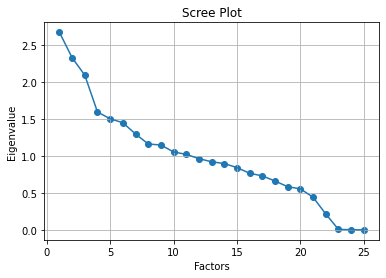

In [40]:
plt.scatter(range(1,f_df.shape[1]+1),ev)
plt.plot(range(1,f_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

По критерию Кайзера (eigenvalue > 1) в факторный анализ следует включить первые 10 факторов. Однако согласно графику каменистой осыпи и для удобства интерпретации будут расммотрены только первые 3 фактора, так как уже при увеличении количества факторов до 4 их объяснительная способность достаточно резко снижается.

In [41]:
pd.DataFrame(fa.loadings_, index = [f_df.columns])

,0,1,2
V_salary,-0.134568,-0.181042,0.359773
v_results,0.017241,0.242545,-0.248538
v_company,-0.071099,-0.413737,-0.071514
v_interest,0.202200,0.148457,0.203507
v_influence,-0.063184,-0.306529,-0.388971
v_cond,-0.211207,0.154406,0.442757
v_better,0.083599,0.137025,-0.578103
v_success,0.006374,0.003563,-0.194608
v_convenience,0.091420,0.132441,0.550003
goal_1.0,0.110257,-0.109217,0.002470


### Интерпретация факторного анализа

* **Группа 1. Творцы**  
Предпочитают интересную работу. В будущем нацелены на выполнение "функциональной" работы, отсутсвие серьезной ответственности. Работа в организации по трудовому договору. Размер компании при этом не имеет серьерзного значения.
* **Группа 2. Стартаперы**  
В работе наиболее важны результаты труда, при этом статус комании не имеет никакого значения. Готовы к переработкам и высокому уровню ответственности. Нацелены на открытие собственного бизнеса. Ожидают наиболее высокого дохода.
* **Группа 3. Материалисты**  
Наиболее заинтересованы в высокой зарплате и комфортных условиях труда. Выражена ориентация на материальные ценности, при этом важность социальных и внешних ценностей занижается. Планируют работать в госкомпаниях или становиться рекуводителями среднего звена.

### Вывод
Гипотеза 1 и 3 подтвердились лишь частично. Студенты с выраженными внутренними действительно менее склонны стремиться к руководящим позициям.   
Однако две другие группы не соответствуют выделенным на теоретическом уровне. Тем не менее, связь между стремлением к высокой зарплате и желанием занимать руководящую должность прослеживается.

### Задача 2

Для проверки второй гипотезы будет построена модель логистической регрессии, где целевая переменная -  "Наличие желания занимать руководящую позицию". Для этого переменная "Нацеленность на руководящую позицию" (goal) будет перекодирована в бинарную переменную, где значения от 0 до 2 станут 0 (отсутствие желания занимать руководящую позицию), а значения от 3 до 5 - 1 (наличие желания занимать руководящую позицию).   
Зависимыми переменными будут выступать переменные из блоков оценки важности различных soft skills и hard skills и способов их развития.  
Для смысловой интерпретации будут отобраны переменные, чей вес в итоговой модели по модулю составит более 0,2.

In [42]:
f_y = df.dropna(subset = ['goal'])

In [43]:
y = f_y['goal'].apply(lambda elem: 0 if elem <= 2 else 1)

In [44]:
cat = cat_df.loc[:, 'career_start_1.0':'education_start_5.0']

In [45]:
X = f_y.loc[:, 'team_work':'my_prof_2'].join(cat)

In [47]:
X = X.fillna(0)

In [48]:
X = X[X.index.isin(f_y.index)]

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty ='l1', solver = 'liblinear')
model.fit(X, y)

LogisticRegression(penalty='l1', solver='liblinear')

In [50]:
pd.DataFrame(model.coef_.reshape([-1, 1]), index = X.columns)

,0
team_work,0.360935
communication,0.019408
conflicts,-0.035565
critics,-0.181084
stress,0.231170
deadlines,-0.004314
creativity,0.180059
work_life_balance,-0.165069
info_search,-0.172448
learn_new,-0.034854


#### Переменные, оказывающие положительное влияние на вероятность отнесения респондента к группе желающих занимать руководящую позицию:
* **team_work** - умение работать в команде
* **stress** - стрессоустойчивость
* **dec_make** - умение принимать самостоятельные решения
* **projects** - наличие опыта создания собственных проектов
* **leader** - лидерские качества
* **comp_prog** -  развитие навыков использования компьютерных программ, технических навыков
* **my_prof** - прохождение дополнительных курсов по специальности

#### Переменные, оказывающие положительное влияние на вероятность отнесения респондента к группе не желающих занимать руководящую позицию:
* **comp** - навыки использования компьютерных программ
* **prof_litr** - чтение профессиональной литературы
* **olymp** - написание олимпиад
* **nothing** - респондент не занимается ничем из вышеперечисленного
* **present** - развитие навыков презентации проектов
* **info** - развитие навыков поиска информации
* **psyc_know** - чтение литературы по психологии и саморазвитию
* **work_life_know** - чтение литературы о развитии навыка соблюдения баланса жизни и работы
* **comp_know** - обучение компьютерным программам
* **career_start_1.0 и career_start_2.0** - представление о необходимости наличия опыта работы для начала карьеры
* **education_start_4.0 и education_start_5.0** - представление о необходиомсти наличия законченного высшего образования для начала карьеры

### Вывод
Гипотеза частично подтверждается, так как группе респондентов, нацеленных на занятие высоких должностей, действительно скорее свойственно уделять больше внимания развитию soft skills, особенно социальным (умение работать в команде, лидерские качества). 
Респонденты, не нацеленные на занятие высоких позиций в организационной иерархии, напротив, уделяют больше внимания hard skills (получение навыков работы в компьютерных программах, получение высшего образования, написание профильных олимпиад, чтение профессиональной литературы). Можно выделить также их склонность развивать методологические soft skills - умение презентовать информацию, поиск информации в открытых источниках.  
Тем не менее, наблюдается некоторая рассогласованность влияния переменных, описывающих субъективное представление респондента о важности навыка и переменных, отмечающих реальные практики, используемые респондентом для развития этих навыков. Например, респонденты, нацеленные на высокие должностные позиции, не отмечали важности наличия профессиональных значний как таковых, однако более склонны развивать их, участвуя в проектах и читая профильную литературу. 